In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json

file_csv = 'ap2020_anonymized_cleaned.csv'
timed_file_csv = 'ap2020_anonymized_cleaned_with_time.csv'
plt.style.use('bmh')

In [2]:
df = pd.read_csv(file_csv)

In [3]:
df['datum a čas'] = df['datum a čas'].astype(np.datetime64)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   4967 non-null   int64         
 1   číslo        4967 non-null   int64         
 2   ročník       4967 non-null   int64         
 3   datum a čas  4967 non-null   datetime64[ns]
 4   příjat       4967 non-null   object        
 5   důvod        4967 non-null   object        
 6   odeslán      4967 non-null   object        
 7   lékař        4967 non-null   object        
 8   vek          4967 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 349.4+ KB


In [5]:
df['time'] = df['datum a čas'].apply(lambda x: x.time())
df['hour'] = df['time'].apply(lambda x: x.hour)
df['minute'] = df['time'].apply(lambda x: x.minute)
df['weekday_index'] = df['datum a čas'].apply(lambda x: x.weekday())
df['week_number'] = df['datum a čas'].apply(lambda x: x.isocalendar()[1])

df.to_csv(timed_file_csv, index=None)

In [6]:
df.head()

,Unnamed: 0,číslo,ročník,datum a čas,příjat,důvod,odeslán,lékař,vek,time,hour,minute,weekday_index,week_number
0,0,20200001,46,2020-01-01 04:18:00,přes RZP/LSPP,bolest na hrudi,na oddělení KK,MUDr. Jan První,77,04:18:00,4,18,2,1
1,1,20200002,83,2020-01-01 09:09:00,z ambulance KK IKEM,jiný,domácí ošetření,MUDr. Pavel Druhý,40,09:09:00,9,9,2,1
2,2,20200003,72,2020-01-01 11:35:00,bez doporučení,palpitace,domácí ošetření,MUDr. Pavel Druhý,51,11:35:00,11,35,2,1
3,3,20200004,99,2020-01-01 14:23:00,bez doporučení,bolest na hrudi,na oddělení KK,MUDr. Pavel Druhý,24,14:23:00,14,23,2,1
4,4,20200005,28,2020-01-01 15:06:00,přes RZP/LSPP,jiný,na oddělení KK,MUDr. Pavel Druhý,95,15:06:00,15,6,2,1


In [7]:
print(f'First date in dataset: {df["datum a čas"].min().date()}')
print(f'Last date in dataset: {df["datum a čas"].max().date()}')

First date in dataset: 2020-01-01
Last date in dataset: 2020-12-31


In [8]:
def get_timeframe(hour: int, minutes: int) -> str:
    return f'{hour:02}:{0 if minutes < 30 else 30 :02}'

# we operate in 24-hour time
possible_time_frames = [ f'{hour:02}:{30 if half_hour == 1 else 0 :02}' for hour in range(24) for half_hour in range(2) ]
#possible_time_frames

Cases amount by half hour


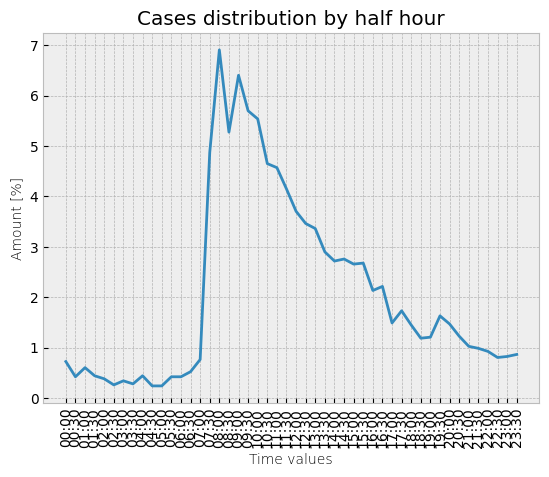

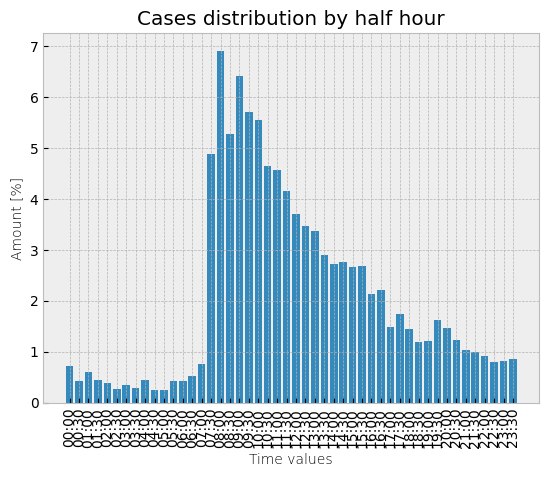

In [9]:
d = { timeframe: 0 for timeframe in possible_time_frames }

# count cases for each time frame
frames = list(df['time'].apply(lambda x: get_timeframe(x.hour, x.minute)))

for frame in frames:
    d[frame] += 1

with open('timeframes_by_halfhour.json', 'w') as json_file:
    print(json.dumps(d), file=json_file)

# convert to %

summed = sum(d[key] for key in d.keys())

for key in d.keys():
    d[key] = 100 * d[key] / summed
    
print('Cases amount by half hour')

plt.ylabel('Amount [%]', fontweight='light')
plt.xlabel('Time values', fontweight='light')
plt.title('Cases distribution by half hour')
plt.plot(possible_time_frames, [ d[timeframe] for timeframe in possible_time_frames])
_ = plt.xticks(
    rotation=90,
    horizontalalignment='center'
)
plt.show()

plt.ylabel('Amount [%]', fontweight='light')
plt.xlabel('Time values', fontweight='light')
plt.title('Cases distribution by half hour')
plt.bar(possible_time_frames, [ d[timeframe] for timeframe in possible_time_frames])
_ = plt.xticks(
    rotation=90,
    horizontalalignment='center'
)
plt.show()

Cases amount by hour


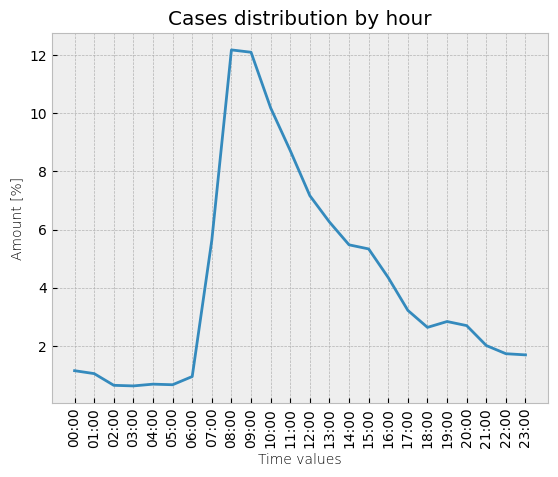

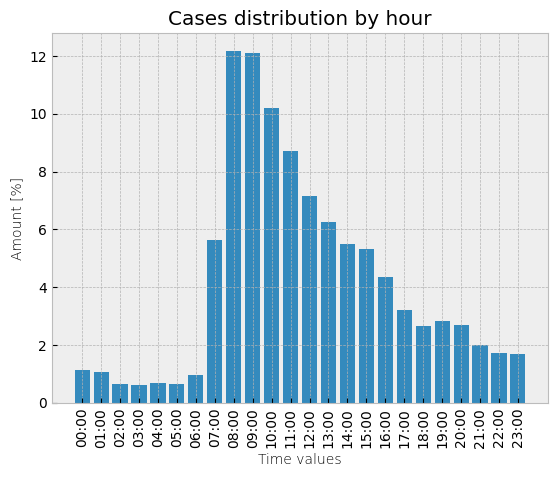

In [10]:
def get_timeframe(hour: int, minutes: int) -> str:
    return f'{hour:02}:00'

# we operate in 24-hour time
possible_time_frames = [ f'{hour:02}:00' for hour in range(24) ]

d = { timeframe: 0 for timeframe in possible_time_frames }

# count cases for each time frame
frames = list(df['time'].apply(lambda x: get_timeframe(x.hour, x.minute)))

for frame in frames:
    d[frame] += 1
    
with open('timeframes_by_hour.json', 'w') as json_file:
    print(json.dumps(d), file=json_file)

# convert to %

summed = sum(d[key] for key in d.keys())

for key in d.keys():
    d[key] = 100 * d[key] / summed

print('Cases amount by hour')

plt.ylabel('Amount [%]', fontweight='light')
plt.xlabel('Time values', fontweight='light')
plt.title('Cases distribution by hour')
plt.plot(possible_time_frames, [ d[timeframe] for timeframe in possible_time_frames])
_ = plt.xticks(
    rotation=90,
    horizontalalignment='center'
)
plt.show()

plt.ylabel('Amount [%]', fontweight='light')
plt.xlabel('Time values', fontweight='light')
plt.title('Cases distribution by hour')
plt.bar(possible_time_frames, [ d[timeframe] for timeframe in possible_time_frames])
_ = plt.xticks(
    rotation=90,
    horizontalalignment='center'
)
plt.show()

We can see that peak amount of cases as from 8:00 to 9:00 with steady decline until 2 in the morning where cases stabilize until 6:00 after which follows steed incline to already mentioned peak hours.

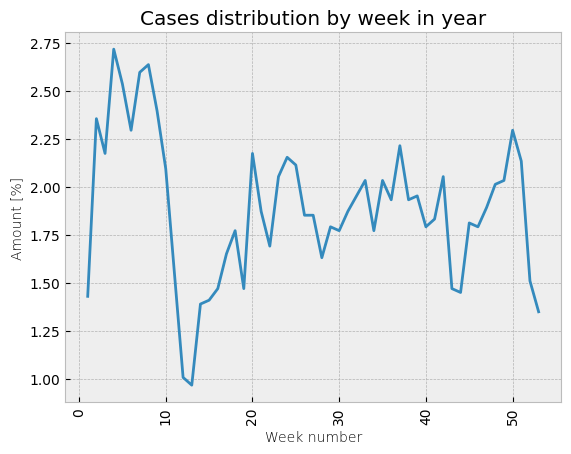

In [11]:
possible_weeks = list( range(1, len(df['week_number'].unique()) + 1) )

week_counter = { week_number: 0 for week_number in possible_weeks}

weekdays = list(df['week_number'])

for weekday in weekdays:
    week_counter[weekday] += 1
    
summed = sum( week_counter[key] for key in week_counter )

for week_key in week_counter.keys():
    week_counter[week_key] = 100 * week_counter[week_key] / summed
    
plt.ylabel('Amount [%]', fontweight='light')
plt.xlabel('Week number', fontweight='light')
plt.title('Cases distribution by week in year')
plt.plot(possible_weeks, [ week_counter[week] for week in possible_weeks])
_ = plt.xticks(
    rotation=90,
    horizontalalignment='center'
)
plt.show()

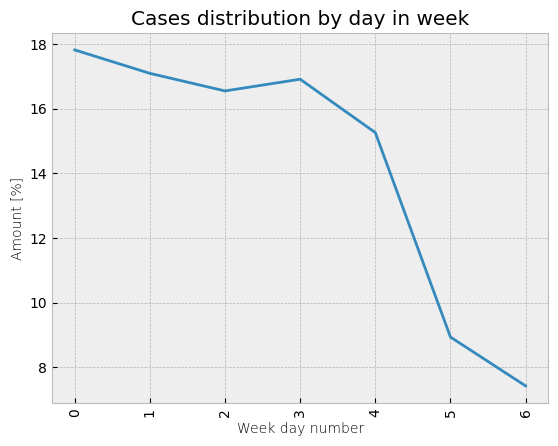

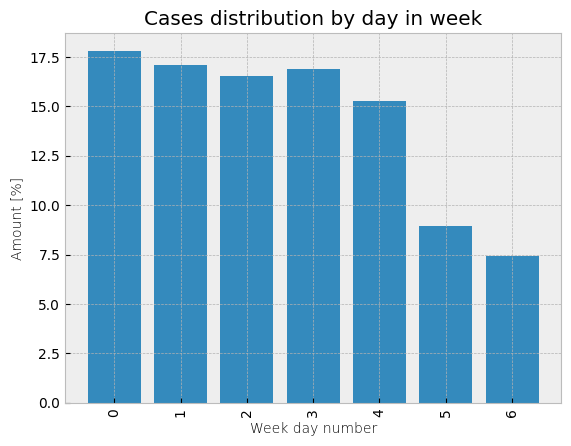

In [16]:
possible_weeks = list( range(7) )

week_counter = { week_number: 0 for week_number in possible_weeks}

weekdays = list(df['weekday_index'])

for weekday in weekdays:
    week_counter[weekday] += 1
    
summed = sum( week_counter[key] for key in week_counter )

for week_key in week_counter.keys():
    week_counter[week_key] = 100 * week_counter[week_key] / summed
    
plt.ylabel('Amount [%]', fontweight='light')
plt.xlabel('Week day number', fontweight='light')
plt.title('Cases distribution by day in week')
plt.plot(possible_weeks, [ week_counter[week] for week in possible_weeks])
_ = plt.xticks(
    rotation=90,
    horizontalalignment='center'
)
plt.show()

plt.ylabel('Amount [%]', fontweight='light')
plt.xlabel('Week day number', fontweight='light')
plt.title('Cases distribution by day in week')
plt.bar(possible_weeks, [ week_counter[week] for week in possible_weeks])
_ = plt.xticks(
    rotation=90,
    horizontalalignment='center'
)
plt.show()